# ** Introduction to Machine Learning**
### **Computer Homework 3**

*Radmehr Karimian*

*Student ID: 98103556*


# Problem C5

In [13]:
# Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import copy
import os
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.losses import categorical_crossentropy
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from numpy import linalg as LA
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/media/gdrive', force_remount=True)

df = pd.read_csv(r'/media/gdrive/MyDrive/ML/CHW3/fashion-mnist.csv')
raw_data = np.array(object=df)

Mounted at /media/gdrive


We use the given percentages to split the dataset. The features (value of the pixels) are normalized.

In [18]:
train_per = 0.50
valid_per = 0.35
test_per = 0.15

# spliting labels and features
n_feature = raw_data.shape[1]
n_data = raw_data.shape[0]

x = raw_data[:, 0:n_feature-1]/255.
y = raw_data[:, n_feature-1].reshape(n_data,1)

x_train = x[0:np.int(n_data*train_per), :]
x_train2 = 255*x_train
y_train = y[0:np.int(n_data*train_per), :]
train_dataset = np.concatenate((x_train,y_train), axis=1)
y_train = y_train.ravel()

x_valid = x[np.int(n_data*train_per):np.int(n_data*(train_per+valid_per)), :]
x_valid2 = 255*x_valid
y_valid = y[np.int(n_data*train_per):np.int(n_data*(train_per+valid_per)), :]
valid_dataset = np.concatenate((x_valid,y_valid), axis=1)
y_valid = y_valid.ravel()

x_test = x[np.int(n_data*(train_per+valid_per)):, :]
x_test2 = 255*x_test
y_test = y[np.int(n_data*(train_per+valid_per)):, :]
test_dataset = np.concatenate((x_test,y_test), axis=1)
y_test = y_test.ravel()



## Method 1: SVM with Linear Kernel
Using the SVC (Support Vector Classifier) function from the sklearn library, we create a model that classifies the data using the best fit hyperplane. We use the confusion_matrix and accuracy_score function to evaluate the predicted label vector.

In [17]:
from sklearn.metrics import confusion_matrix

In [16]:
#from sklearn.svm import SVC

clf = SVC(kernel = 'linear')
clf_trained_model = clf.fit(x_train, y_train)
y_predicted = clf_trained_model.predict(x_valid)
confusion_matrix_SVM_linear = confusion_matrix(y_valid, y_predicted)
accuracy_SVM_linear = accuracy_score(y_valid, y_predicted)

print('Confusion Matrix: \n', confusion_matrix_SVM_linear)
print('\nAccuracy Score: \n', accuracy_SVM_linear)

Confusion Matrix: 
 [[263   4   8  11   0   0  35   0   5   0]
 [  5 337   1   5   0   0   0   0   0   0]
 [ 15   2 266   3  29   0  32   0   3   0]
 [ 26   9   6 279   8   0   5   0   1   0]
 [  3   1  53  21 241   0  39   0   2   0]
 [  0   0   0   0   1 275   0  17   2   2]
 [ 62   2  37  11  37   0 208   0   3   0]
 [  0   0   0   0   0  20   0 362   1  17]
 [  5   0   5   1   1   2  11   3 340   2]
 [  0   0   0   0   0  14   0  20   0 321]]

Accuracy Score: 
 0.8262857142857143


## Method 2: SVM with Gaussian Kernel
Unlike the previous part, in this method, we use the Gaussian Kernel to classify the data using the SVM algorithm. The optimum sigma in this method is about 3.7e-7 (for unnormalized pixel values). The following figure indicates the relation between accuracy and sigma.

For sigma =  3.727593720314938e-07
Confusion Matrix: 
  [[278   2   2  12   0   0  26   0   6   0]
 [  3 331   2  11   0   0   1   0   0   0]
 [  7   0 279   5  32   0  26   0   1   0]
 [ 15   0   0 302  10   0   7   0   0   0]
 [  0   1  28  14 285   0  30   0   2   0]
 [  0   0   0   0   0 277   0  13   2   5]
 [ 69   1  37   9  29   0 211   0   4   0]
 [  0   0   0   0   0   9   0 376   1  14]
 [  1   0   3   1   2   2   4   2 354   1]
 [  0   0   0   0   0   6   0  18   0 331]]

Accuracy Score: 
 0.864


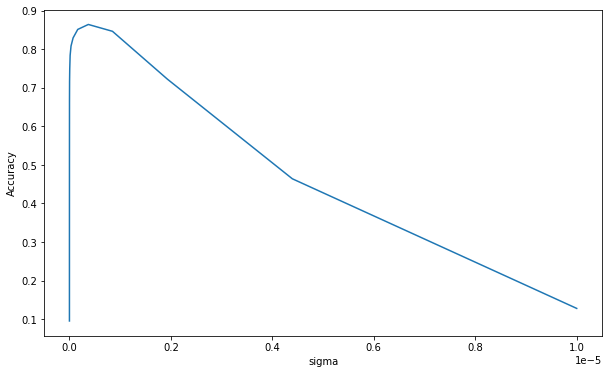

In [33]:
# from sklearn.svm import SVC

sigmas = np.logspace(-10, -5, num = 15)
accuracy_prediction = {}
accuracies = []
sigma_max = 0

for sigma in sigmas:
  clf = SVC(kernel = 'rbf', gamma = sigma)
  clf_trained_model = clf.fit(x_train2, y_train)
  y_predicted = clf_trained_model.predict(x_valid2)
  accuracy = accuracy_score(y_valid, y_predicted)
  accuracy_prediction[accuracy] = y_predicted
  accuracies.append(accuracy)
  if accuracy == max(accuracy_prediction.keys()):
    sigma_max = sigma

accuracy_max = max(accuracy_prediction.keys())
y_predicted = accuracy_prediction.get(accuracy_max)
accuracy_SVM_gaussian = accuracy_max

confusion_matrix_SVM_gaussian = confusion_matrix(y_valid, y_predicted)
print('For sigma = ', sigma_max)
print('Confusion Matrix: \n ', confusion_matrix_SVM_gaussian)
print('\nAccuracy Score: \n', accuracy_max)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(list(sigmas), list(accuracies))
plt.xlabel("sigma")
plt.ylabel("Accuracy")
plt.show()


## Method 3: K-Nearest Neighbor
We use the KNeighborsClassifier function to classify the data using the K-Nearest Neighbor algorithm. The accuracy for different values of k is plotted in the figure. The optimum value of k is 4.

For k =  4
Confusion Matrix: 
  [[281   2   6  10   1   0  22   0   4   0]
 [  6 327   4   9   0   0   2   0   0   0]
 [  7   0 245   3  44   0  50   0   1   0]
 [ 20   3   1 291  11   0   7   0   1   0]
 [  1   1  54  24 230   0  49   0   1   0]
 [  3   0   1   0   0 213   0  55   2  23]
 [ 94   1  51   5  42   0 164   1   2   0]
 [  0   0   0   0   0   6   0 370   0  24]
 [  2   0   8   6   5   1  11  10 323   4]
 [  0   0   0   0   0   3   0  14   0 338]]

Accuracy Score: 
 0.8028571428571428


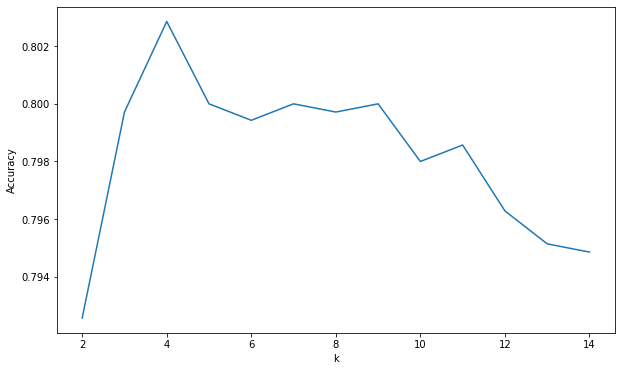

In [36]:
# from sklearn.neighbors import KNeighborsClassifier

ks = range(2, 15)
accurecies = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf_trained_model = clf.fit(x_train, y_train)
    y_predicted = clf_trained_model.predict(x_valid)
    accuracy = accuracy_score(y_valid, y_predicted)
    accurecies.append(accuracy)
    if accuracy == max(accurecies):
      k_best = k
      y_predicted_best = y_predicted

accuracy_KNearest = max(accurecies)
confusion_matrix_KNearest = confusion_matrix(y_valid, y_predicted)
print('For k = ', k_best)
print('Confusion Matrix: \n ', confusion_matrix_KNearest)
print('\nAccuracy Score: \n', accuracy_KNearest)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(list(ks), list(accurecies))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()


## Method 4: Decision Tree
Using the DecisionTreeClassifier function, we train the decision tree model for the training dataset which has the lowest accuracy score.

In [49]:
#from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf_trained_model = clf.fit(x_train, y_train)
y_predicted = clf_trained_model.predict(x_valid)
accuracy_tree = accuracy_score(y_valid, y_predicted)

confusion_matrix_tree = confusion_matrix(y_valid, y_predicted)
print('Confusion Matrix: \n ', confusion_matrix_tree)
print('\nAccuracy Score: \n', accuracy_tree)

Confusion Matrix: 
  [[230   6   7  21   3   4  45   0   9   1]
 [  3 321   1  15   3   1   1   0   3   0]
 [ 13   2 221   6  49   1  51   1   6   0]
 [ 10  14   4 263  18   2  17   0   6   0]
 [  5   5  69  19 201   1  57   0   3   0]
 [  1   1   0   0   0 247   0  22   8  18]
 [ 59   7  55  13  52   2 167   0   5   0]
 [  0   0   0   0   0  34   1 317   2  46]
 [  7   1  17   3  10   8  10   5 304   5]
 [  0   0   0   1   1  20   0  27   0 306]]

Accuracy Score: 
 0.7362857142857143


## Method 5: Neural Networks
To create the desired Neural Networks, we add the following layers to keras.Sequential:


```
keras.layers.Input(shape=(28*28,))
keras.layers.Dense(100, activation='relu')
keras.layers.Dense(100, activation='relu')
keras.layers.Dense(10, activation='softmax')
```
We also set the optimization method to SGD, the loss function to CategoricalCrossentropy using the following code:

```
model.compile( 
    optimizer='sgd', 
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
```


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [137]:
model = keras.Sequential([
    keras.layers.Input(shape=(28*28,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile( 
    optimizer='sgd', 
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()
n_epoch = 0;
epochs = []
accurecies_nn = []
accurecies_nn_test = []

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               78500     
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


We train our model using the fit function (for a reasonable number of epochs). The accuracy for the Validation and Test set for different epochs is plotted, and after 75 epochs, the accuracy score doesn't change drastically, and overfitting doesn't accrue as expected.

Epoch 1/5
157/157 [==============================] - 1s 5ms/step - loss: 0.0487 - accuracy: 0.9898 - val_loss: 0.6443 - val_accuracy: 0.8466
Epoch 2/5
157/157 [==============================] - 1s 5ms/step - loss: 0.0484 - accuracy: 0.9898 - val_loss: 0.6705 - val_accuracy: 0.8469
Epoch 3/5
157/157 [==============================] - 1s 6ms/step - loss: 0.0500 - accuracy: 0.9890 - val_loss: 0.6606 - val_accuracy: 0.8434
Epoch 4/5
157/157 [==============================] - 1s 5ms/step - loss: 0.0528 - accuracy: 0.9884 - val_loss: 0.6289 - val_accuracy: 0.8514
Epoch 5/5
157/157 [==============================] - 1s 6ms/step - loss: 0.0471 - accuracy: 0.9888 - val_loss: 0.6707 - val_accuracy: 0.8454

After 200 epochs ...
Confusion Matrix: 
  [[219   4   6  18   0   1  71   1   6   0]
 [  1 336   1   7   1   0   2   0   0   0]
 [  8   2 240   5  52   0  40   0   3   0]
 [  7   5   0 297  12   0  13   0   0   0]
 [  2   1  14  17 289   0  35   0   2   0]
 [  0   0   0   0   0 277   0  17   2

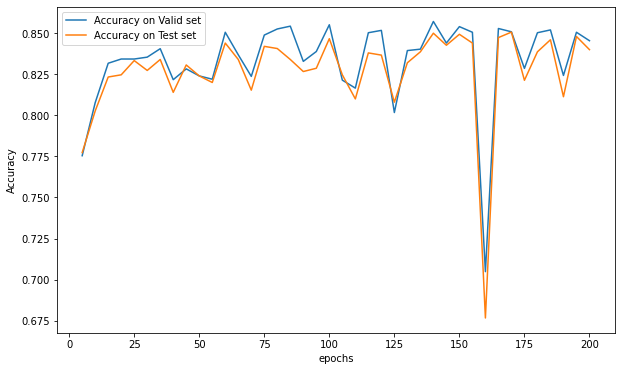

In [151]:
for i in range(1,2):
  model.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
  n_epoch = n_epoch + 5
  y_predicted = np.argmax(model.predict(x_valid), axis=1)
  accuracy_nn = accuracy_score(y_valid, y_predicted)
  epochs.append(n_epoch)
  accurecies_nn.append(accuracy_nn)
  y_predicted2 = np.argmax(model.predict(x_test), axis=1)
  accuracy_nn2 = accuracy_score(y_test, y_predicted2)
  accurecies_nn_test.append(accuracy_nn2)
  if accuracy_nn == max(accurecies_nn):
    best_model_nn = model

confusion_matrix_nn = confusion_matrix(y_valid, y_predicted)
print('\nAfter',n_epoch,'epochs ...')
print('Confusion Matrix: \n ', confusion_matrix_nn)
print('\nAccuracy Score: \n', accuracy_nn)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(list(epochs), list(accurecies_nn), label='Accuracy on Valid set')
plt.plot(list(epochs), list(accurecies_nn_test), label='Accuracy on Test set')

plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Conclusion
The Neural Network is one of the safest methods of classifying. Not only it has a good accuracy score for the Validation set (up to ~86%), but it can also have a high accuracy score for the Testing set (about ~85%). The value of accuracy score for the Validation and Testing sets are plotted in the previews part and The Confusion Matrix after 200 epochs has the following values:


```
Confusion Matrix: 
  [[219   4   6  18   0   1  71   1   6   0]
  [  1 336   1   7   1   0   2   0   0   0]
  [  8   2 240   5  52   0  40   0   3   0]
  [  7   5   0 297  12   0  13   0   0   0]
  [  2   1  14  17 289   0  35   0   2   0]
  [  0   0   0   0   0 277   0  17   2   1]
  [ 35   1  16  12  39   0 254   0   3   0]
  [  0   0   0   0   0  12   0 378   0  10]
  [  7   0   1   2   3   5   5   3 343   1]
  [  0   0   0   0   0   7   0  20   2 326]]
```

Finding the optimum sigma for the SVM with Gaussian Kernel is challenging, but for sigma =  3.72e-07 (for unnormalized pixel features), we can have the following results:


In [19]:
from sklearn.svm import SVC

sigma = 3.72e-07

clf = SVC(kernel = 'rbf', gamma = sigma)
clf_trained_model = clf.fit(x_train2, y_train)
y_predicted = clf_trained_model.predict(x_valid2)
accuracy_validation = accuracy_score(y_valid, y_predicted)

confusion_matrix_SVM_gaussian = confusion_matrix(y_valid, y_predicted)
print('For Validation set:')
print('Confusion Matrix: \n ', confusion_matrix_SVM_gaussian)
print('\nAccuracy Score: \n', accuracy_validation)

y_predicted = clf_trained_model.predict(x_test2)
accuracy_test = accuracy_score(y_test, y_predicted)

confusion_matrix_SVM_gaussian = confusion_matrix(y_test, y_predicted)
print('For Testing set:')
print('Confusion Matrix: \n ', confusion_matrix_SVM_gaussian)
print('\nAccuracy Score: \n', accuracy_test)


For Validation set:
Confusion Matrix: 
  [[278   2   2  12   0   0  26   0   6   0]
 [  3 331   2  11   0   0   1   0   0   0]
 [  7   0 279   5  32   0  26   0   1   0]
 [ 15   0   0 302  10   0   7   0   0   0]
 [  0   1  28  14 285   0  30   0   2   0]
 [  0   0   0   0   0 277   0  13   2   5]
 [ 69   1  37   9  29   0 211   0   4   0]
 [  0   0   0   0   0   9   0 376   1  14]
 [  1   0   3   1   2   2   4   2 354   1]
 [  0   0   0   0   0   6   0  18   0 331]]

Accuracy Score: 
 0.864
For Testing set:
Confusion Matrix: 
  [[127   0   0   9   0   0  10   0   2   0]
 [  3 128   3   7   1   0   0   0   2   0]
 [  0   0 123   2  22   0  16   0   0   0]
 [  7   1   0 133   3   0   4   0   0   0]
 [  2   0   7   4 126   0  19   0   1   0]
 [  1   0   0   0   0 126   0  10   1   2]
 [ 32   0  16   4  11   0  88   0   0   0]
 [  0   0   0   0   0   4   0 149   0   2]
 [  0   0   2   0   0   2   3   1 132   0]
 [  0   0   0   0   0   4   0   5   0 143]]

Accuracy Score: 
 0.85
